In [493]:
import pandas as pd
data=pd.read_csv('fifa21 raw data v2.csv')
data_copy=data.copy()
#import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sophie\AppData\Local\Temp\ipykernel_14504\1149088029.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('fifa21 raw data v2.csv')


In [495]:
###DATA CLEANING 
#IR, W/F,SM has star values -needs to convert to regular 1 (make these columns numerical)
#'Club' has new line character in it 
#Convert weight, height columns to numerical values 
#Split the position in the 'position column
#Convert these columns to 'Value','Wage','Release Clause' to string 
#Check with player play more than 10 years


###Tackle the position columns
data_copy[['Position1','Position2','Position3']]=data_copy['Positions'].str.split(', ',expand=True)
Position1_unique_values=data_copy['Position1'].unique().tolist()
list_position_title=[]

for i in Position1_unique:
    list_position_title.append('Position_'+i)
    
list_position


# Columns to check
columns_to_check = ['Position1','Position2','Position3']

# Value to check for
value_to_check =Position1_unique_values

# Create a new column 'value_present' based on the condition
for x, y in zip(value_to_check,list_position):
    data_copy[y] = data_copy[columns_to_check].apply(lambda row: x in row.values, axis=1)
    

for i in list_position:
    data_copy[i]=data_copy[i].astype(str)
    data_copy[i].replace({'True':'Yes','False':'No'},inplace=True)

#Drop columns to check
data_copy.drop(columns=columns_to_check,inplace=True)

###Convert Weight, and Height to numerical values:
data_copy['Weight']=data_copy['Weight'].str.replace('kg','')
data_copy['Weight']=pd.to_numeric(data_copy['Weight'],errors='coerce')

data_copy['Height']=data_copy['Height'].str.replace('cm','')
data_copy['Height']=pd.to_numeric(data_copy['Height'],errors='coerce')

#IR, W/F,SM has star values -needs to replace it
data_copy['IR']=data_copy['IR'].str.replace(' ★','')
data_copy['W/F']=data_copy['W/F'].str.replace(' ★','')
data_copy['SM']=data_copy['SM'].str.replace('★','')

#Club' has new line character in it therefore replace it
data_copy['Club']=data_copy['Club'].str.replace('\n\n\n\n','')

#Calculate the time 
#Convert these columns to 'Value','Wage','Release Clause' to numerical values
from datetime import datetime
current_date=datetime.now().date()
#data_copy['Joined']
current_date=pd.to_datetime(current_date)
data_copy['Joined']=pd.to_datetime(data_copy['Joined'],format='%b %d, %Y')
average_days_in_year = 365.25 
data_copy['Years Joined']=(current_date-data_copy['Joined'])

#Replace Contract column when they have on loan date; replace it with 'On Loan' value :
data_copy.loc[data_copy['Contract'].str.contains('On Loan'),'Contract']='On Loan'

#Handle Value, Wage, Release Clause 
def converted(a):
    if isinstance(a, str):
        if a.find('K')!=-1:
            return float(a.replace('K', '').replace('€', ''))*1000
        elif a.find('M')!=-1:
            return float(a.replace('M', '').replace('€', ''))*10e6
        elif a.find('€')!=-1:
            return float(a.replace('€', ''))
        else:
            return a
    else:
        return a

    
data_copy['Value']=data_copy['Value'].apply(converted)
data_copy['Wage']=data_copy['Wage'].apply(converted)
data_copy['Release Clause']=data_copy['Release Clause'].apply(converted)


C:\Users\Sophie\AppData\Local\Temp\ipykernel_14504\4272114506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_database.loc[(~(contract_database['Contract']=='On Loan')) & (~(contract_database['Contract']=='Free')),'Contract']='Has Contract'


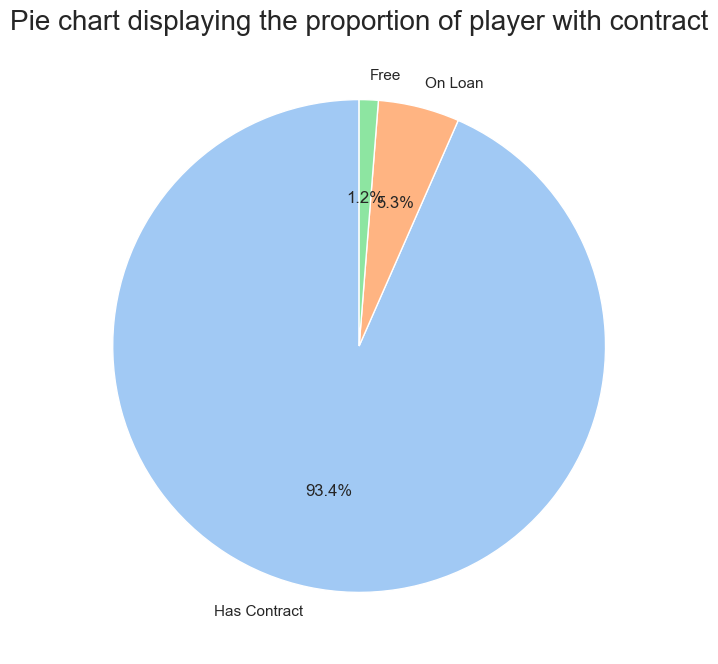

In [497]:
#Plot proportion of player having contract, on loan, or playing for free within the dataset
contract_database =data_copy[['Contract','Name']]

contract_database.loc[(~(contract_database['Contract']=='On Loan')) & (~(contract_database['Contract']=='Free')),'Contract']='Has Contract'
contract_category=contract_database['Contract'].value_counts()

sns.set(style="whitegrid")

# Create a pie chart using Matplotlib with Seaborn color palette
plt.figure(figsize=(8, 8))
plt.pie(contract_category, labels=contract_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie chart displaying the proportion of player with contract',fontsize=20)

# Show the plot
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


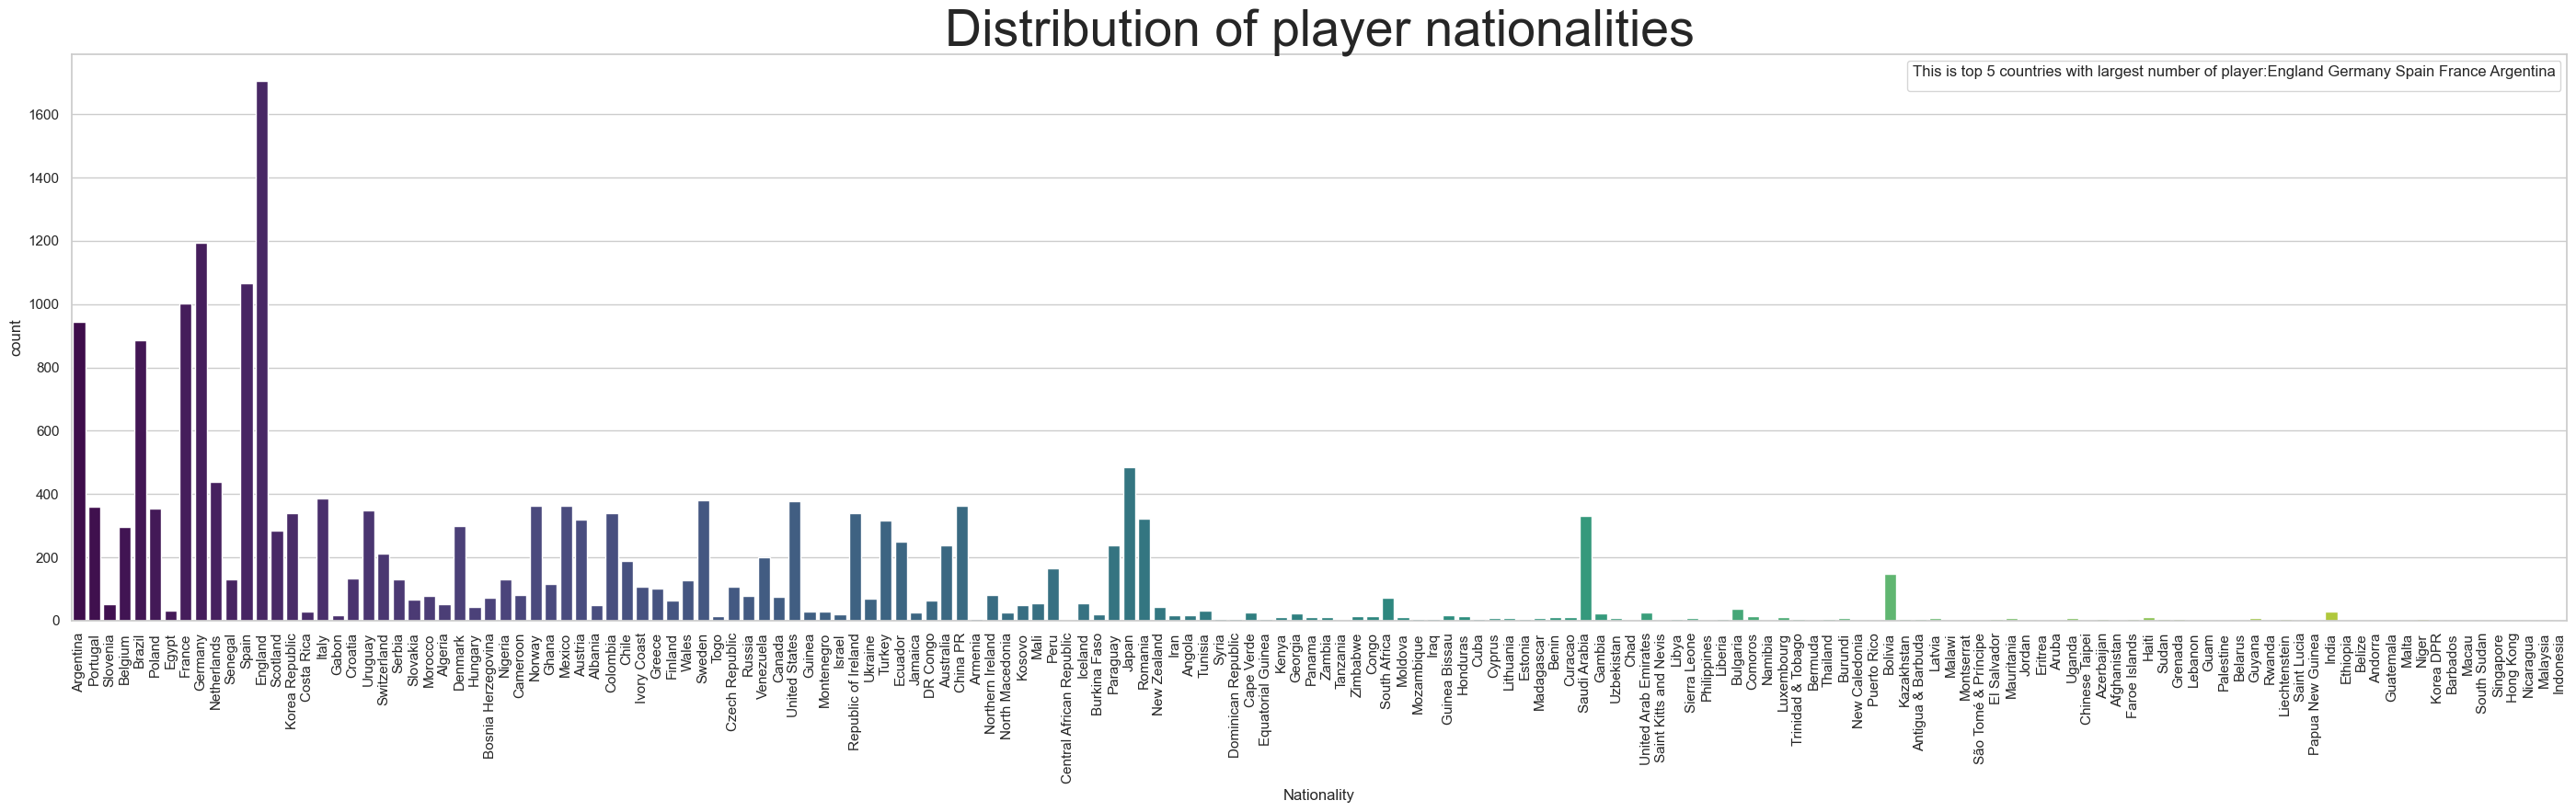

In [498]:
#Plot showing the distribution of different nationalities of player within the dataset
plt.figure(figsize=(35, 8))
sns.countplot(x='Nationality', data=data_copy, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of player nationalities',fontsize=40)
top5countries=(data_copy['Nationality'].value_counts()).rank(ascending=False).head(5).index.tolist()

sentence='This is top 5 countries with largest number of player:'+ ' '.join(top5countries)
plt.legend(loc='upper right', fontsize='small', title=sentence)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_14504\2838163503.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_copy.corr()


Correlation Matrix:


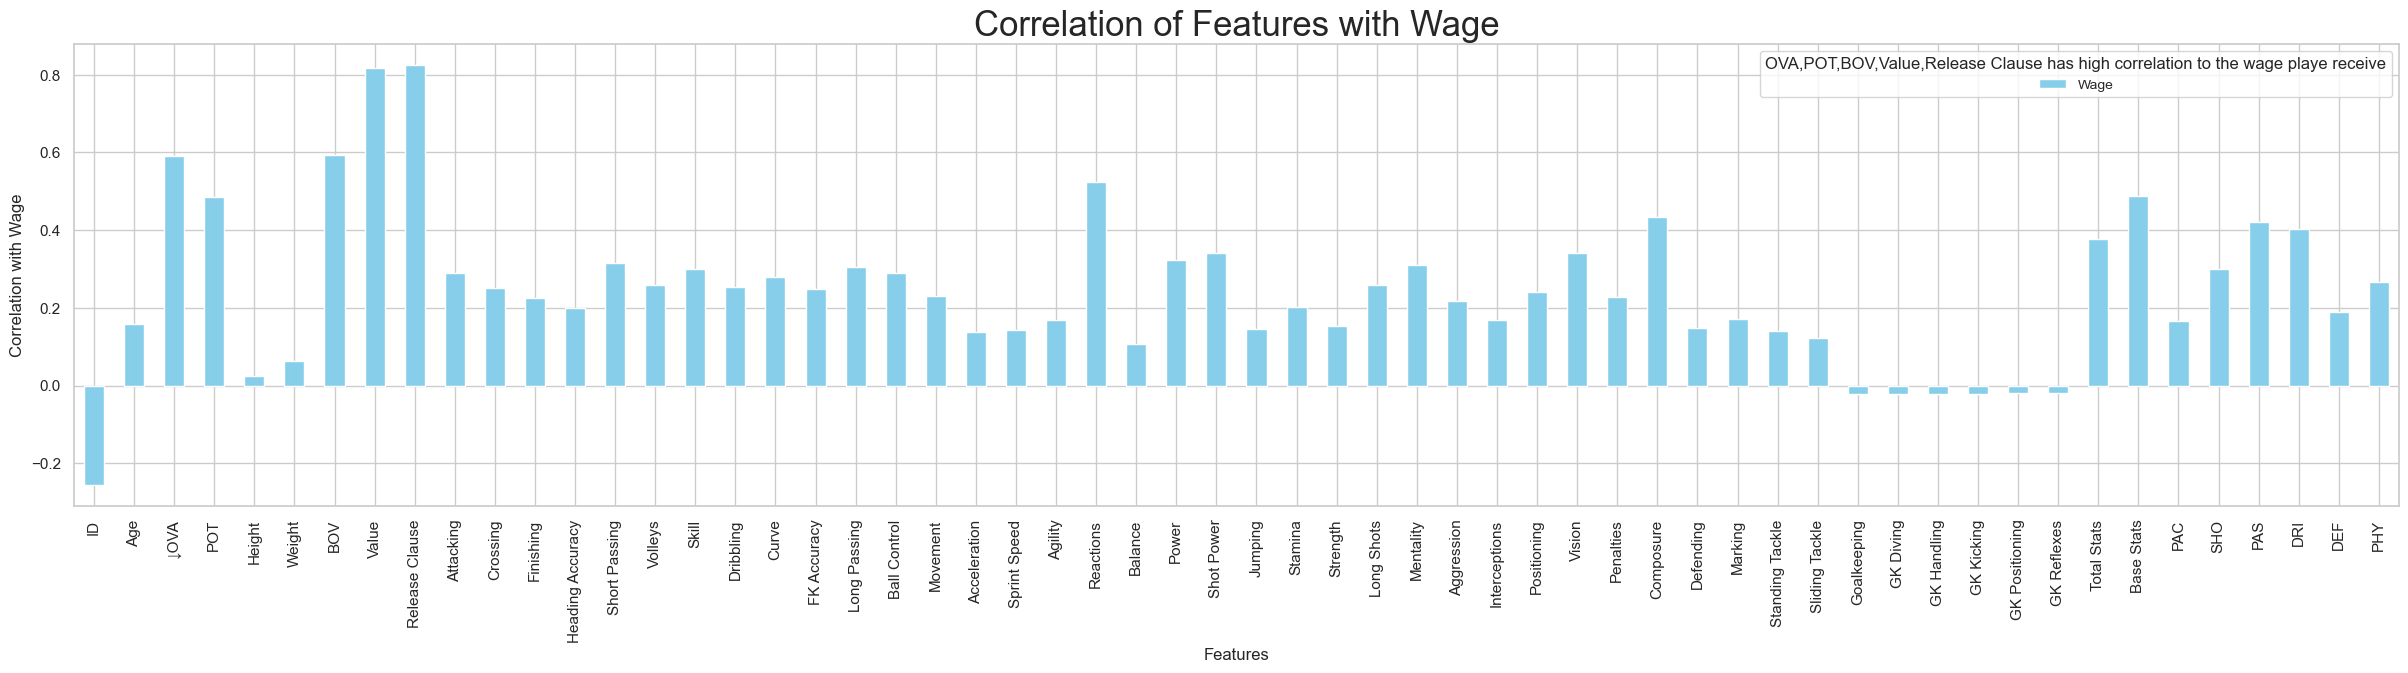

Text(0.5, 0.98, 'Features showing positive correlation with Wage')

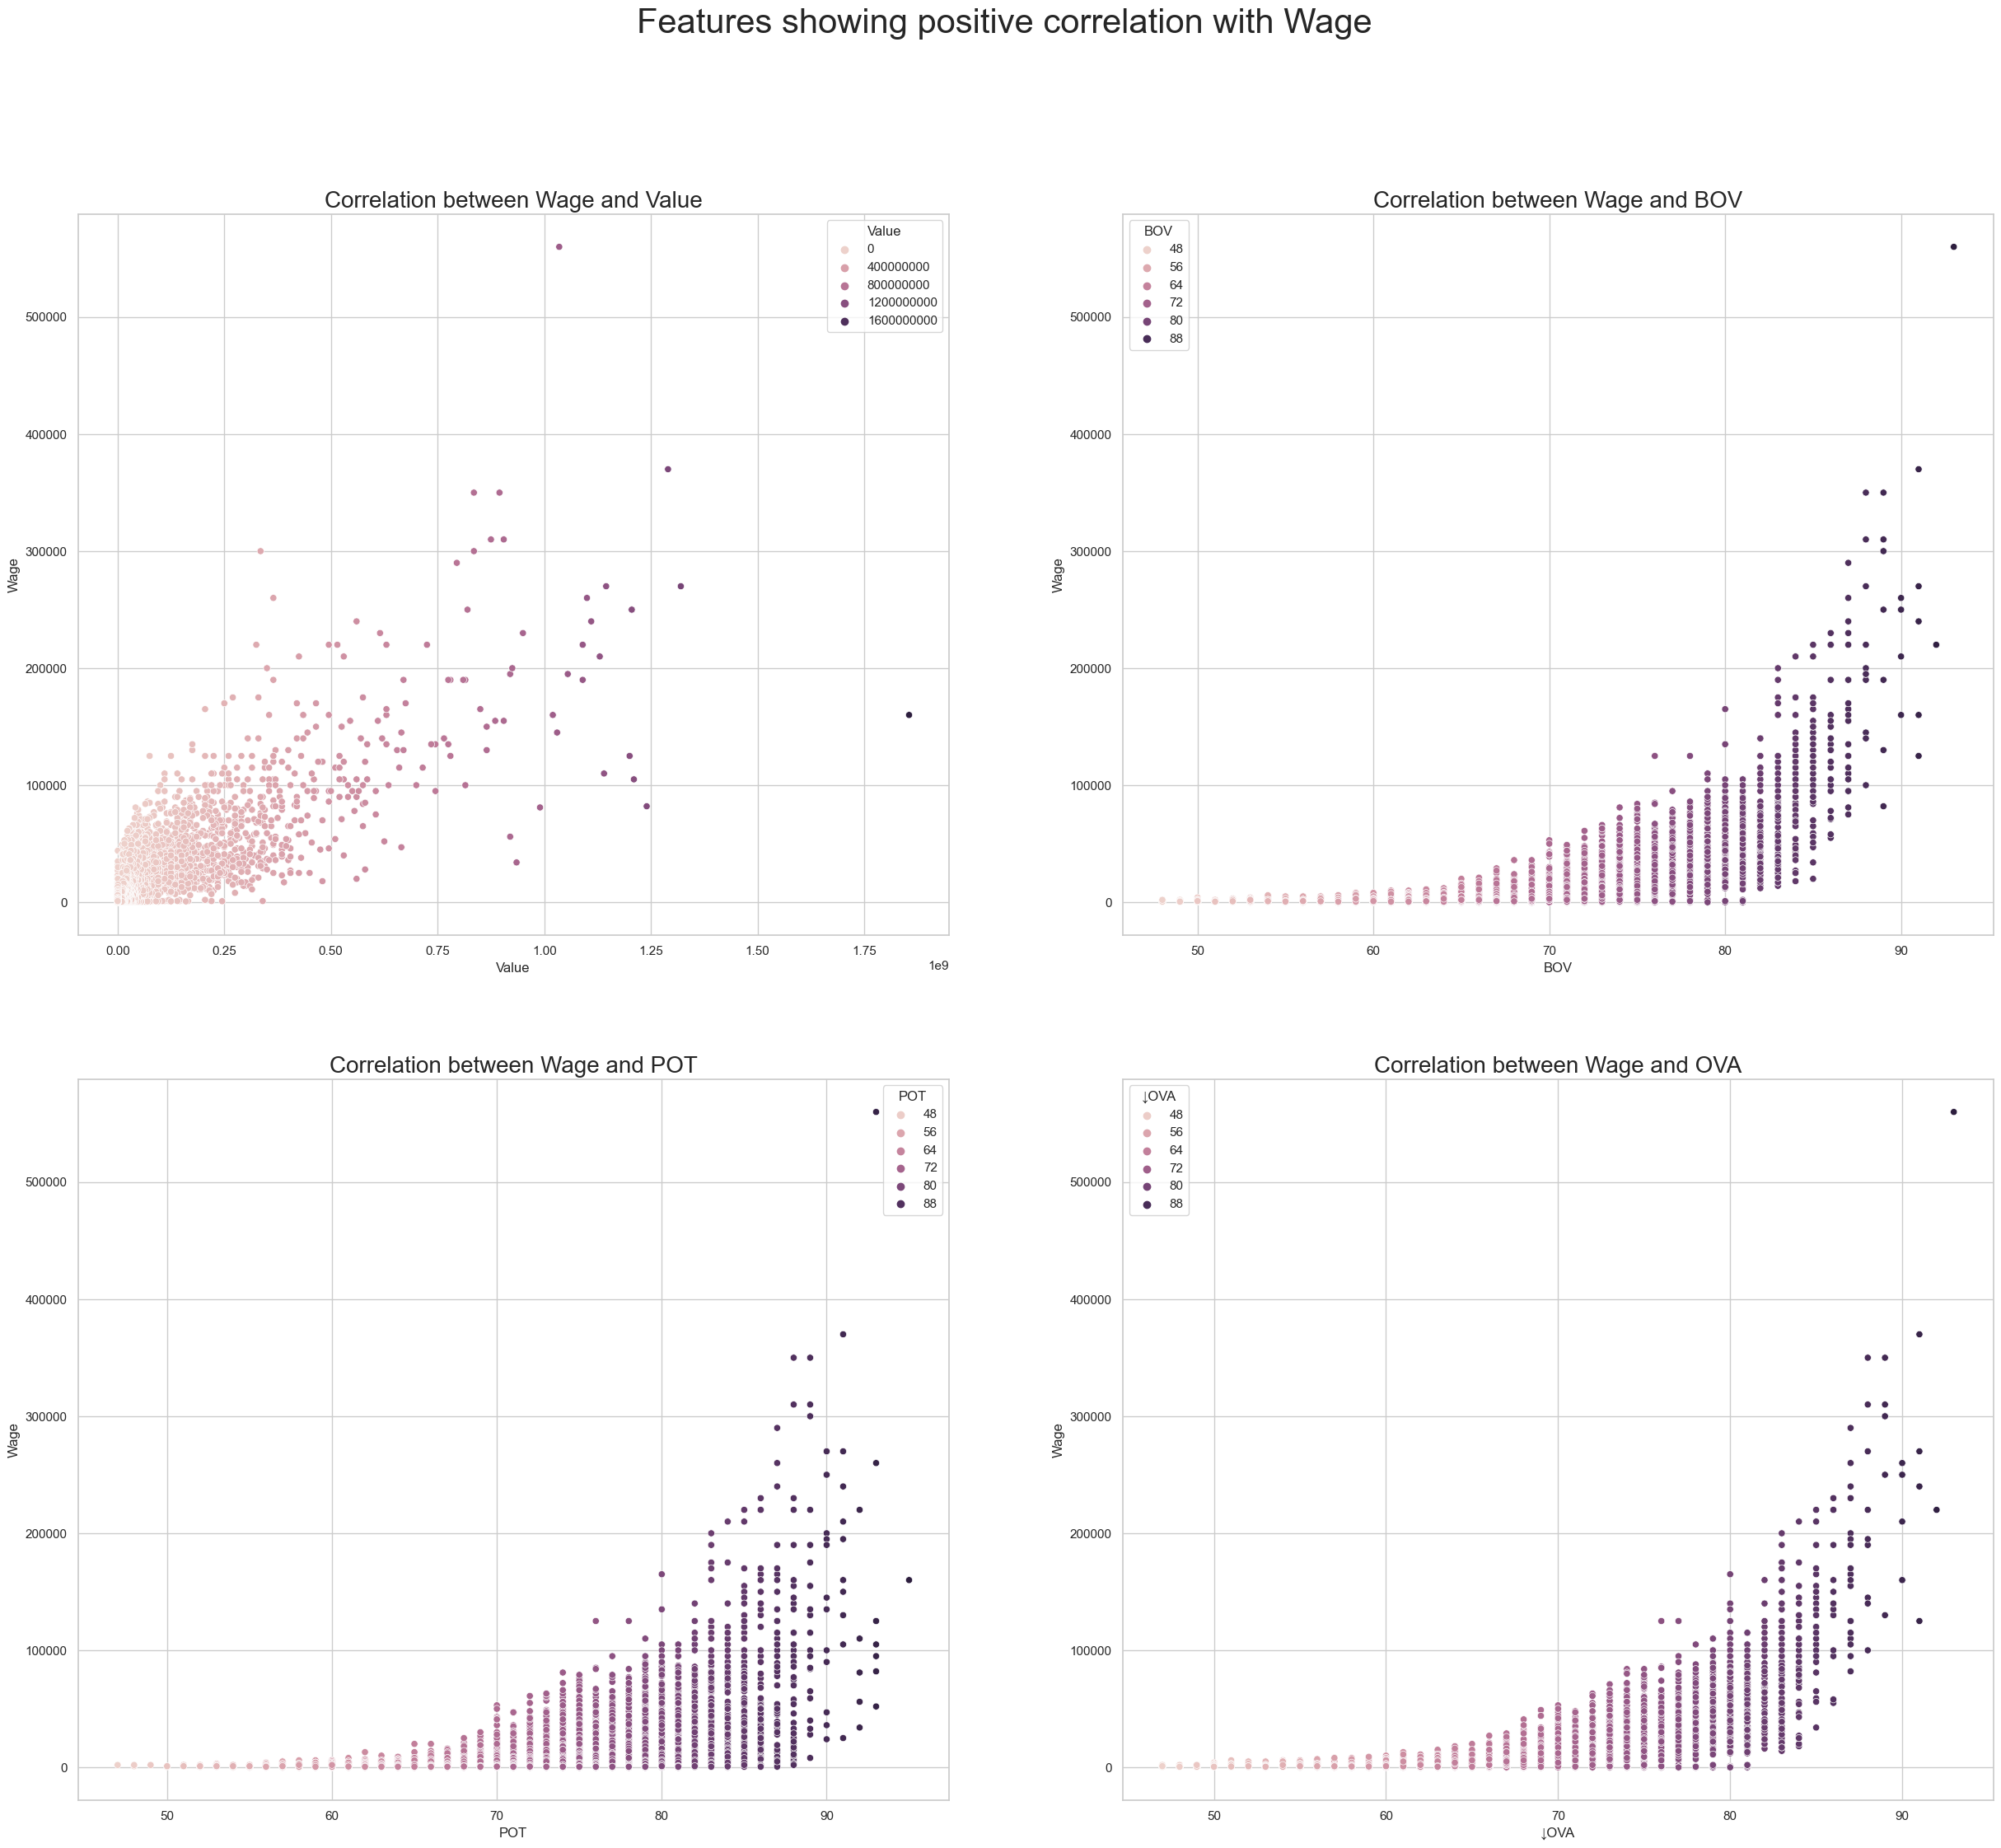

In [530]:
#Measure the correlation of different features contributing to wage value within the dataset
# Calculate the correlation matrix

correlation_matrix = data_copy.corr()

# Print the correlation matrix
print("Correlation Matrix:")
#print(correlation_matrix)

# Extract correlations with the target feature
target_correlations = correlation_matrix['Wage']
plt.figure(figsize=(30, 6))
target_correlations.drop('Wage').plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Wage')
plt.title('Correlation of Features with Wage',fontsize=25)
plt.legend(loc='upper right', fontsize='small', title='OVA,POT,BOV,Value,Release Clause has high correlation to the wage playe receive')
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(30, 25))
# Scatter plot 1
sns.scatterplot(x='Value', y='Wage', data=data_copy, ax=axes[0, 0],hue='Value')
axes[0, 0].set_title('Correlation between Wage and Value',fontsize=20)

# Scatter plot 2
sns.scatterplot(x='BOV', y='Wage', data=data_copy, ax=axes[0, 1],hue='BOV')
axes[0, 1].set_title('Correlation between Wage and BOV',fontsize=20)

# Scatter plot 3
sns.scatterplot(x='POT', y='Wage', data=data_copy, ax=axes[1, 0],hue='POT')
axes[1, 0].set_title('Correlation between Wage and POT',fontsize=20)

# Scatter plot 4
sns.scatterplot(x='↓OVA', y='Wage', data=data_copy, ax=axes[1, 1],hue='↓OVA')
axes[1, 1].set_title('Correlation between Wage and OVA',fontsize=20)

fig.suptitle('Features showing positive correlation with Wage', fontsize=30)

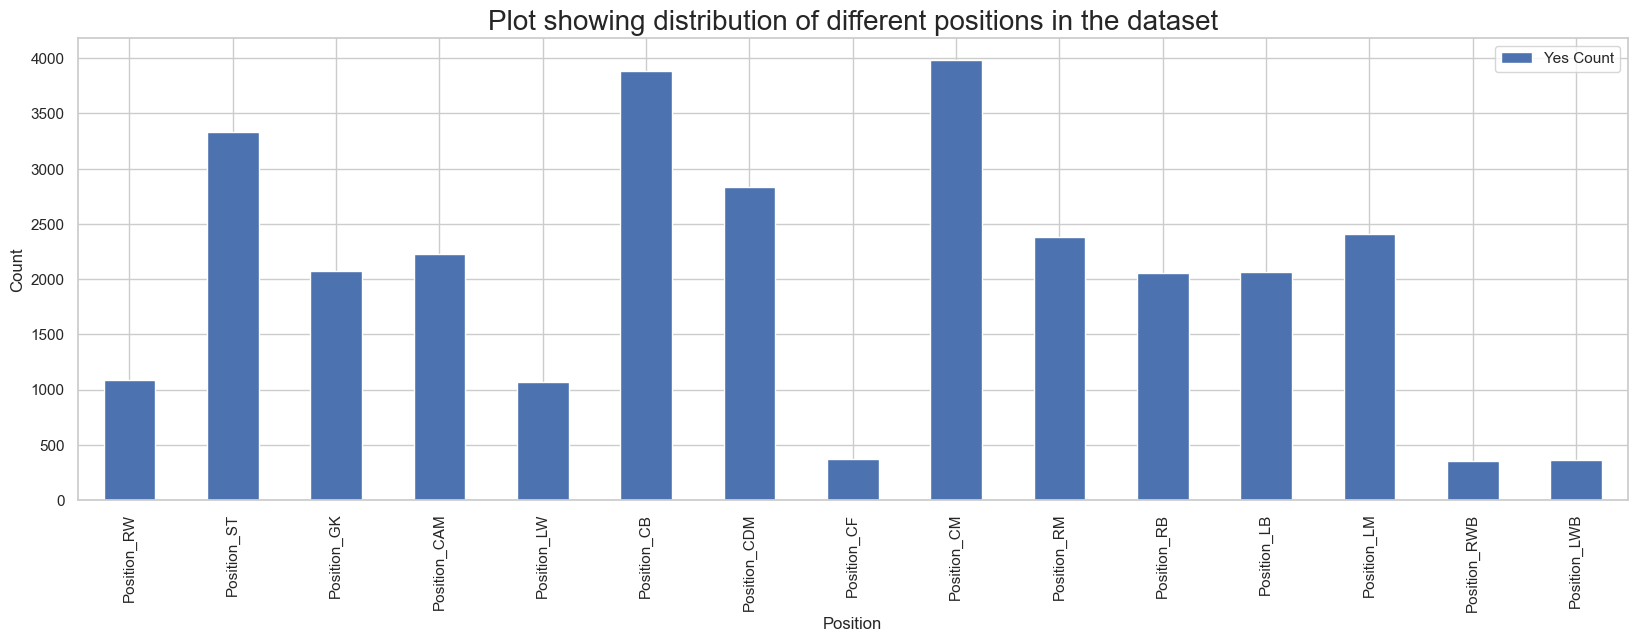

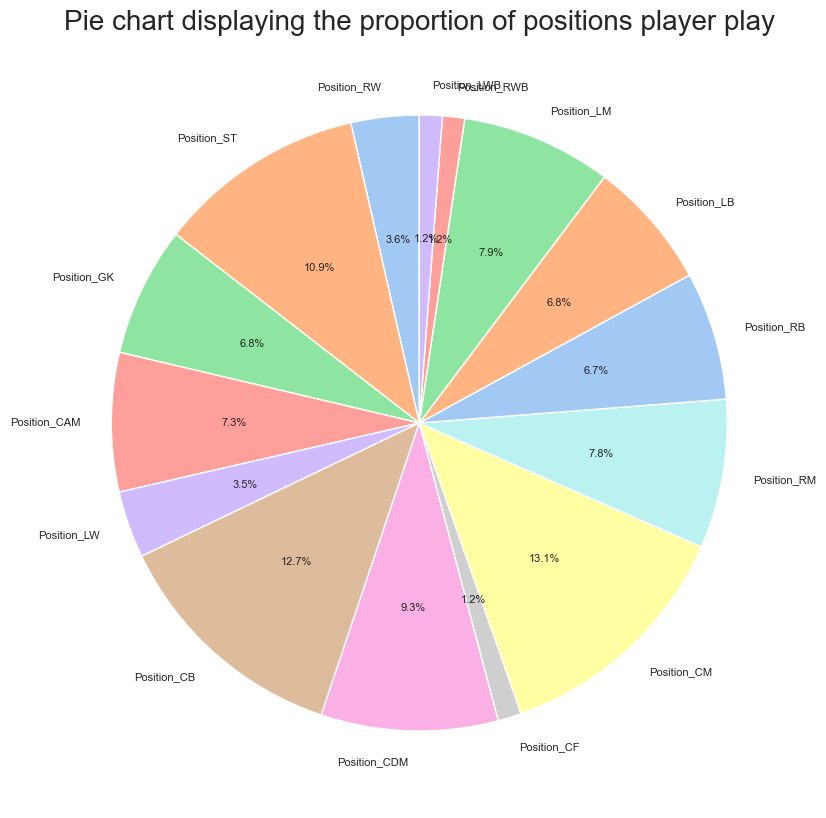

In [526]:
#melted_df = pd.melt(data_copy, var_name=list_position, value_name='Yes')
##Displaying the proportion of positions player play within the dataset
count_yes_list=[]
for i in list_position_title:
    count_yes_list.append(data_copy[i].value_counts()['Yes'])

count_database=pd.DataFrame({'Column Title':list_position_title, 'Yes Count':count_yes_list})

count_database.set_index('Column Title', inplace=True)

# Plot differences between columns using a bar plot
count_database.plot(kind='bar', figsize=(20, 6))
plt.title('Plot showing distribution of different positions in the dataset',fontsize=20)
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(35, 10))
plt.pie(count_database['Yes Count'], labels=count_database.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), textprops={'fontsize': 8})
plt.title('Pie chart displaying the proportion of positions player play',fontsize=20)

# Show the plot
plt.show()


C:\Users\Sophie\AppData\Local\Temp\ipykernel_14504\2285496818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_reputation_database['IR']=pd.to_numeric(high_reputation_database['IR'], errors='coerce')
C:\Users\Sophie\AppData\Local\Temp\ipykernel_14504\2285496818.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =high_reputation_database.corr()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Red indicates positive correlation, whereas blue implies negative correlation to player international reputation


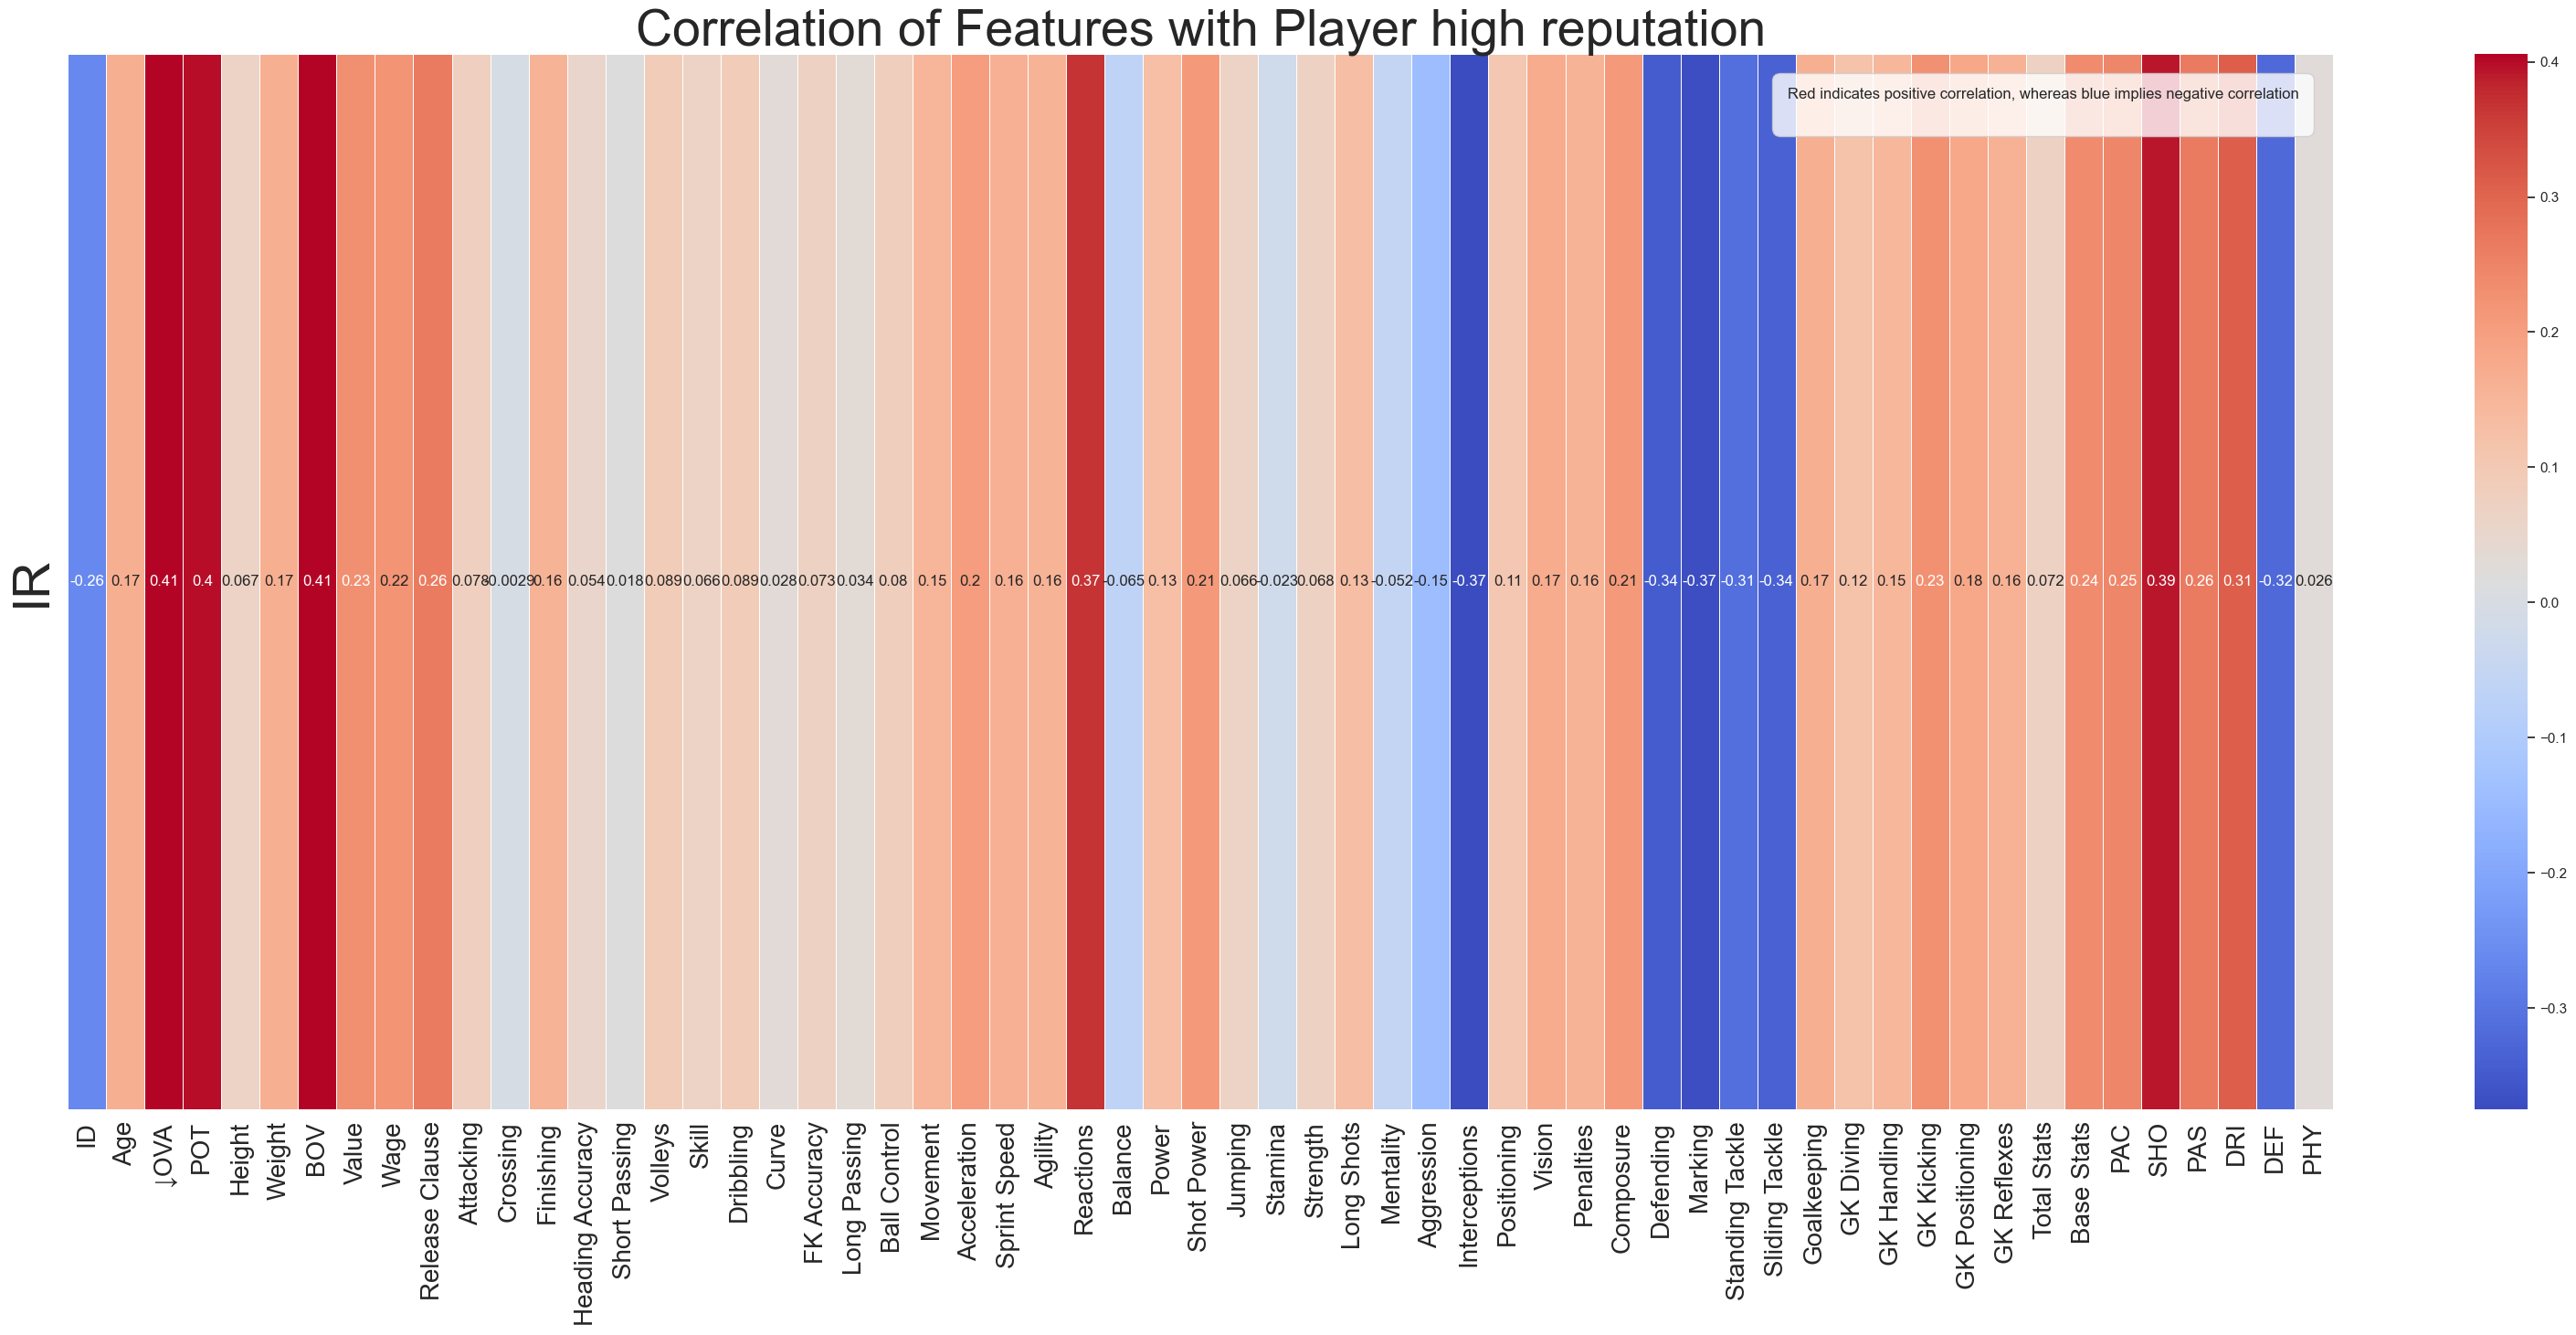

In [600]:
###Display correlation of different features to the player international reputation:
high_IR=['4','5']
high_reputation_database=data_copy[data_copy['IR'].isin(high_IR)]
high_reputation_database['IR']=pd.to_numeric(high_reputation_database['IR'], errors='coerce')
# Calculate the correlation matrix
correlation_matrix =high_reputation_database.corr()

# Extract the correlation of features with respect to the target feature
target_correlation = correlation_matrix['IR'].drop('IR')

# Create a heatmap
plt.figure(figsize=(40, 15))
heatmap=sns.heatmap(target_correlation.to_frame().T, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Features with Player high reputation',fontsize=40)
plt.legend(loc='upper right', fontsize=30, title='Red indicates positive correlation, whereas blue implies negative correlation')
heatmap.set_xticklabels(heatmap.get_xticklabels(),fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=40)
print('Red indicates positive correlation, whereas blue implies negative correlation to player international reputation')
plt.show()

Text(0.5, 0.98, 'Plot associating player prefered foot with their abilities')

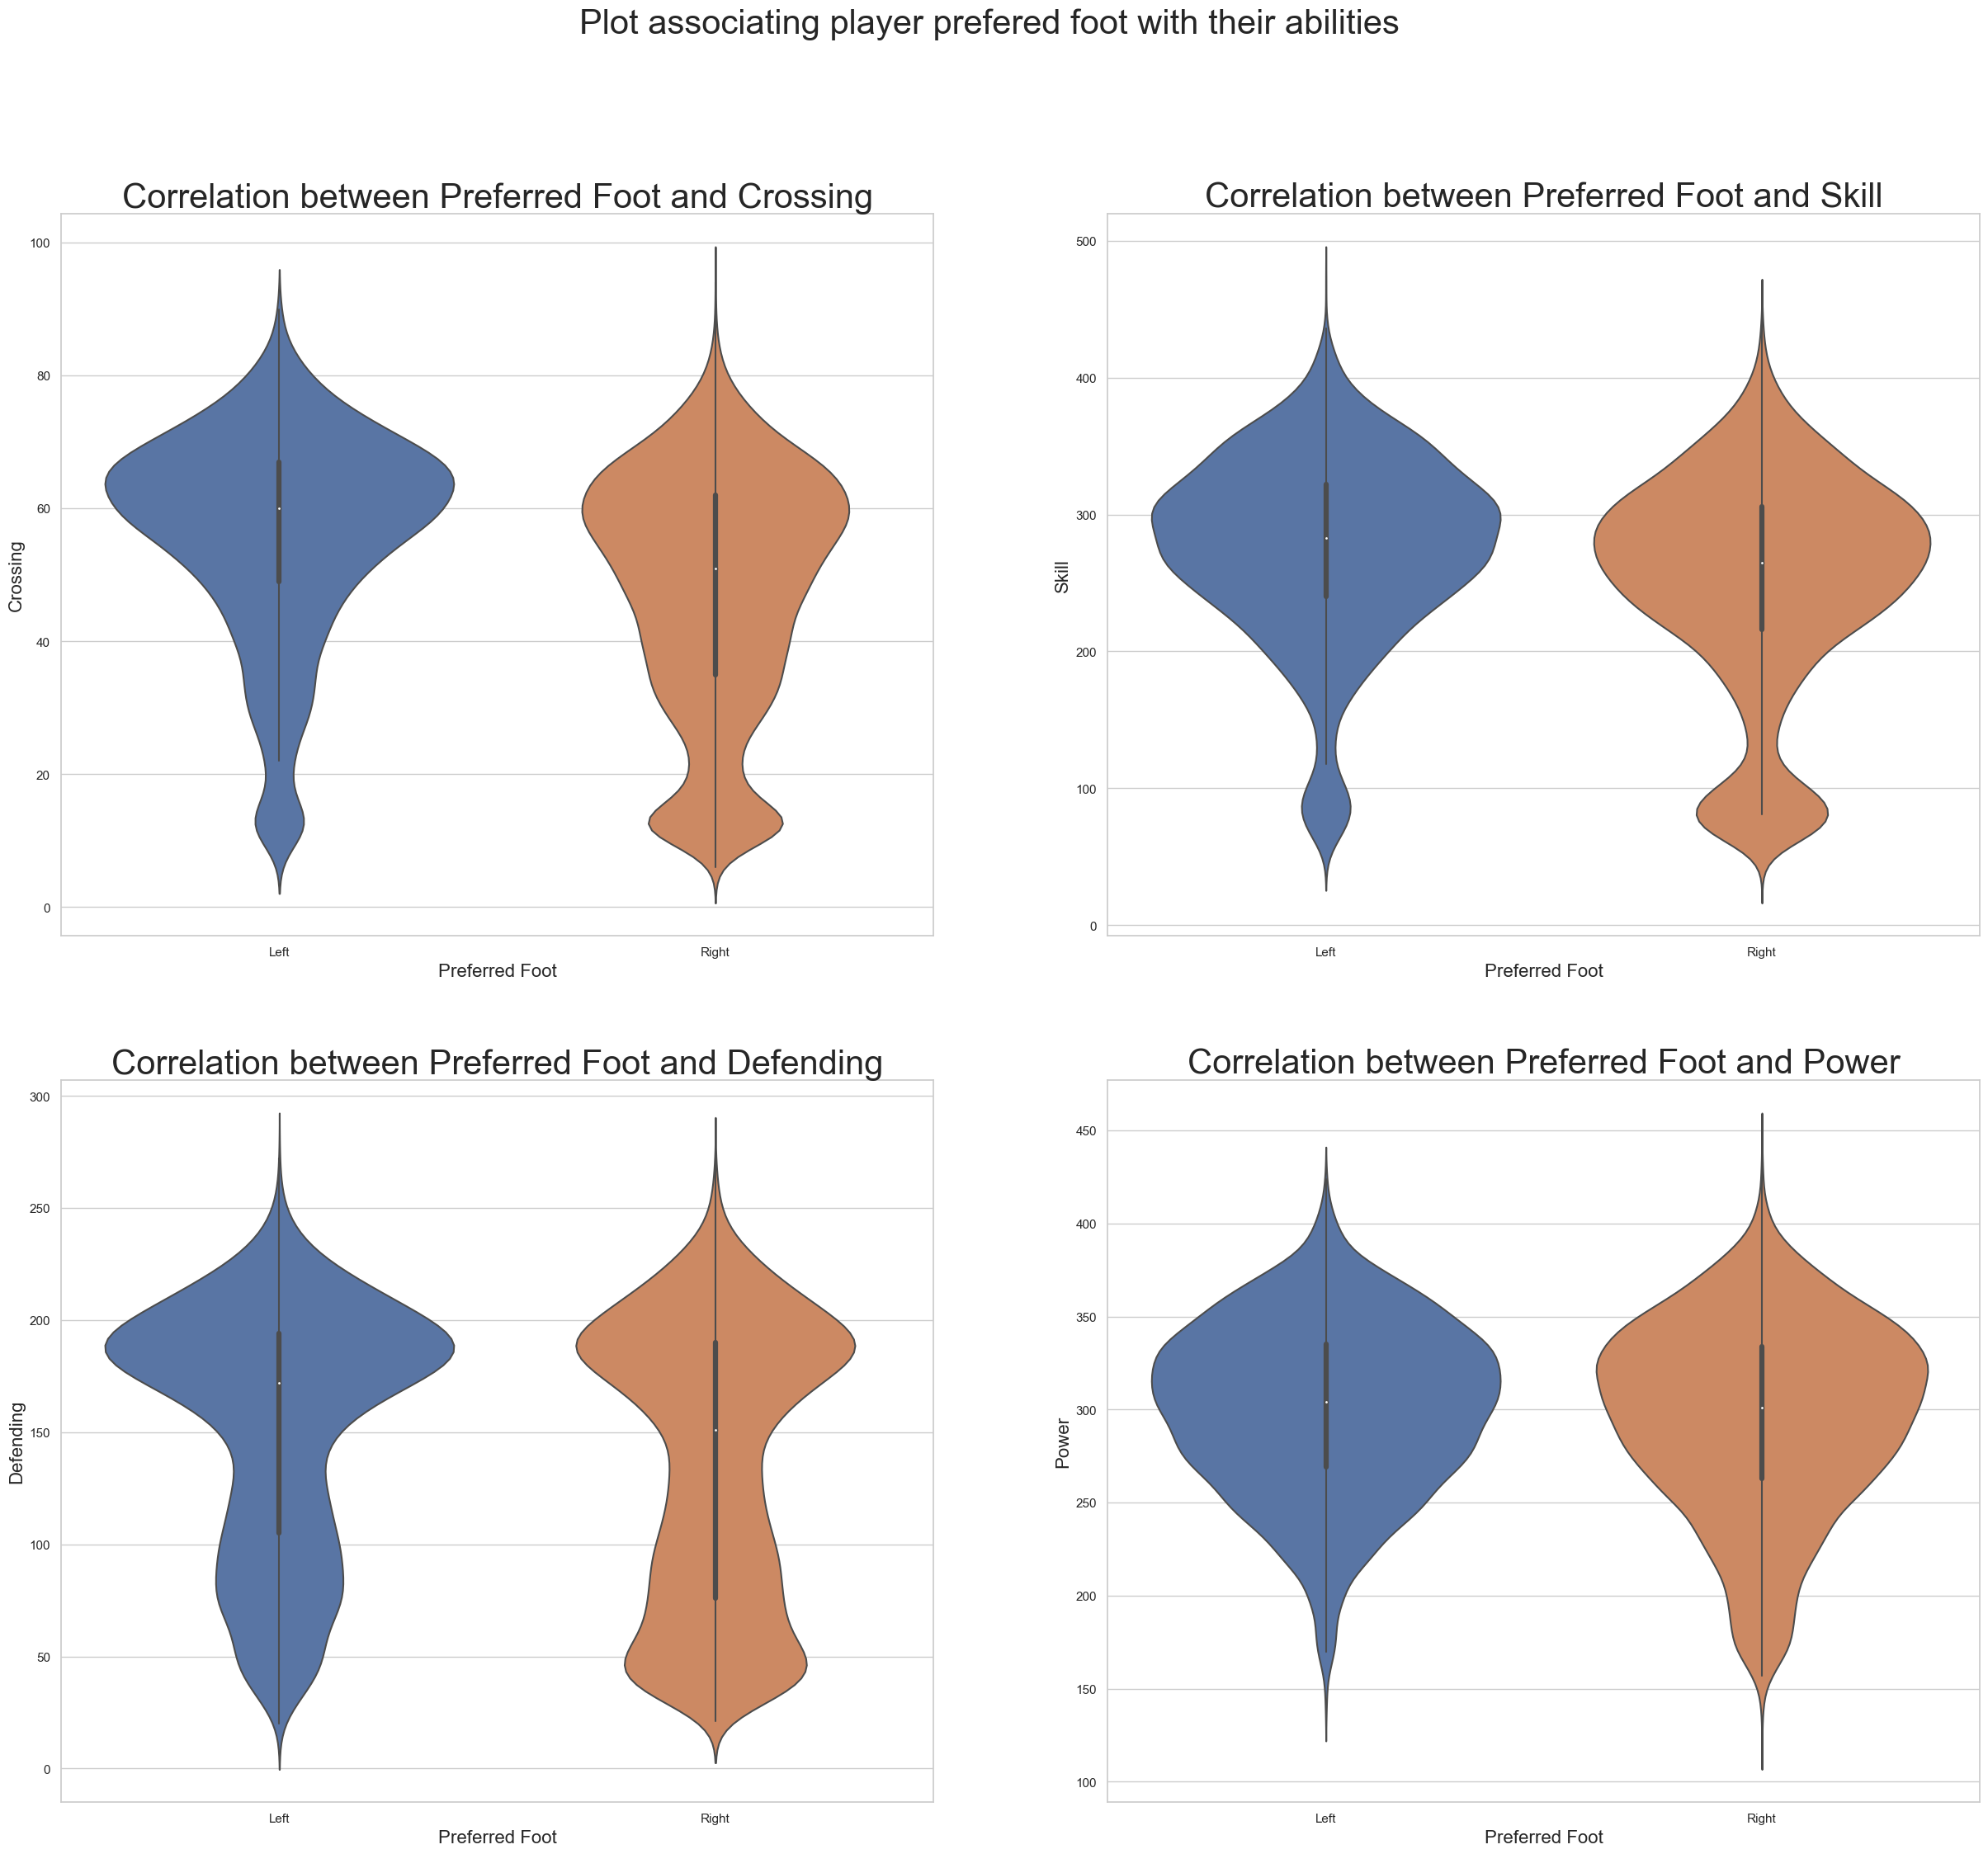

In [595]:
#Generating plot to associate player ability with their foot of choice
fig, axes = plt.subplots(2, 2, figsize=(30, 25))
# Scatter plot 1
sns.violinplot(x='Preferred Foot', y='Crossing', data=data_copy, ax=axes[0, 0])
axes[0, 0].set_title('Correlation between Preferred Foot and Crossing',fontsize=30)
axes[0, 0].set_xlabel('Preferred Foot', fontsize=16)
axes[0, 0].set_ylabel('Crossing', fontsize=16)
# Scatter plot 2
sns.violinplot(x='Preferred Foot', y='Skill', data=data_copy, ax=axes[0, 1])
axes[0, 1].set_title('Correlation between Preferred Foot and Skill',fontsize=30)
axes[0, 1].set_xlabel('Preferred Foot', fontsize=16)
axes[0, 1].set_ylabel('Skill', fontsize=16)
# Scatter plot 3
sns.violinplot(x='Preferred Foot', y='Defending', data=data_copy, ax=axes[1, 0])
axes[1, 0].set_title('Correlation between Preferred Foot and Defending',fontsize=30)
axes[1, 0].set_xlabel('Preferred Foot', fontsize=16)
axes[1, 0].set_ylabel('Defending', fontsize=16)
# Scatter plot 4
sns.violinplot(x='Preferred Foot', y='Power', data=data_copy, ax=axes[1, 1])
axes[1, 1].set_title('Correlation between Preferred Foot and Power',fontsize=30)
axes[1, 1].set_xlabel('Preferred Foot', fontsize=16)
axes[1, 1].set_ylabel('Power', fontsize=16)
fig.suptitle('Plot associating player prefered foot with their abilities', fontsize=30)

Text(0.5, 1.0, 'Distribution of hits across the dataset')

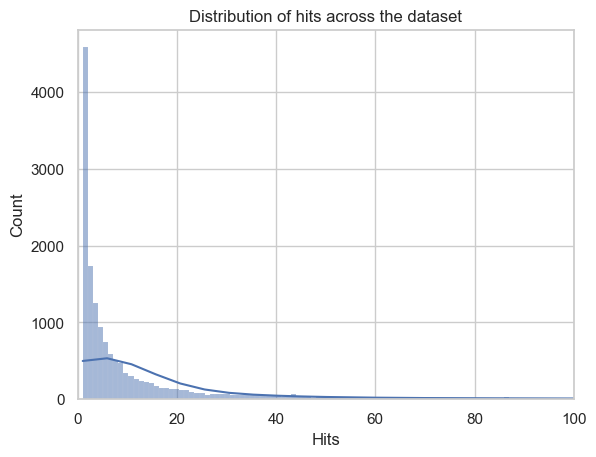

In [615]:
##Plot the distribution of hit across the dataset
data_copy['Hits']=pd.to_numeric(data_copy['Hits'], errors='coerce')
sns.histplot(data_copy['Hits'],kde=True)
plt.xlim(0,100)
plt.title('Distribution of hits across the dataset')